In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("data/diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Q1 price vs x

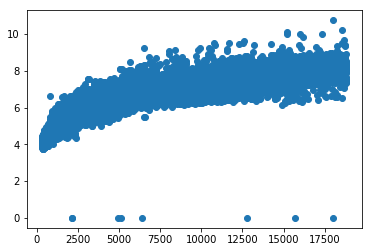

In [4]:
plt.scatter(df.price , df.x)

Text(0,0.5,'Price')

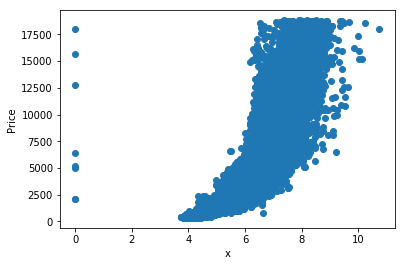

In [7]:
plt.scatter(y=df.price , x=df.x)
plt.xlabel("x")
plt.ylabel("Price")

# Q3 correlation between price vs [x , y , z]

In [9]:
df.corr

<bound method DataFrame.corr of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [11]:
df.corr()["price"]["x"]

0.8844351610161778

In [13]:
df.corr()["price"]["y"]

0.8654208978642225

In [14]:
df.corr()["price"]["z"]

0.8612494438514684

# Q4 Price vs Depth

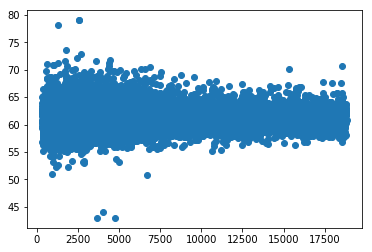

In [17]:
plt.scatter(df.price , df.depth)

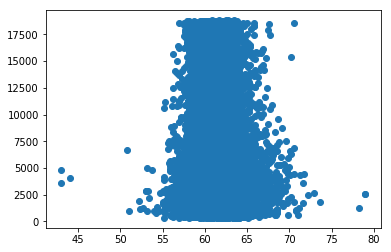

In [18]:
plt.scatter(y = df.price , x = df.depth)

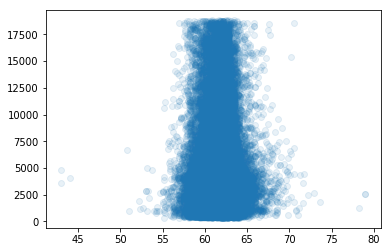

In [19]:
plt.scatter(y = df.price , x = df.depth , alpha=.1)

# Q6 Typical Depth Range

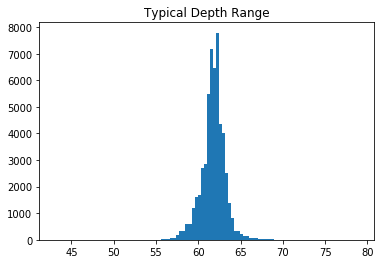

In [23]:
plt.title("Typical Depth Range")
plt.hist(df.depth , bins=100)
plt.show()

# Q7 correlation of depth and price

In [24]:
df.corr()['depth']['price']

-0.010647404584142393

#  Q8 . Price vs carat

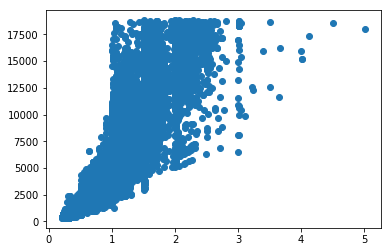

In [26]:
plt.scatter(x=df.carat ,y= df.price)

# Q9 . Price vs Volume

In [27]:
volume = df.x * df.y *df.z

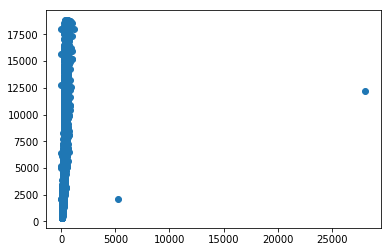

In [29]:
plt.scatter(x = volume , y = df.price)

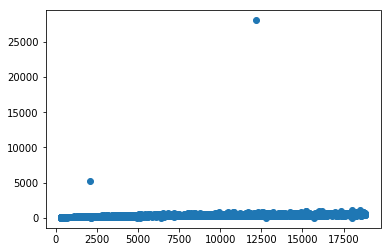

In [30]:
plt.scatter(y = volume , x = df.price)

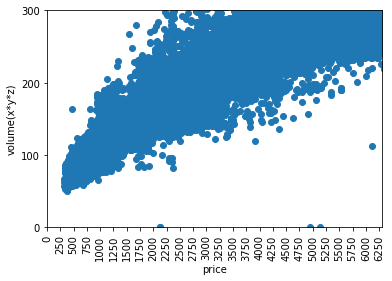

In [40]:
plt.scatter(y = volume , x = df.price)
plt.xlim(xmin = 0 , xmax=df.price.quantile(.80) )
plt.xticks(np.arange(0 , df.price.quantile(.80) , step=250 ) , rotation="vertical")
plt.ylim(ymin = 0 , ymax=volume.quantile(.80) )
plt.yticks(np.arange(0 , volume.quantile(.80) , step=100 ) )
plt.xlabel("price")
plt.ylabel("volume(x*y*z)")
plt.show()

In [46]:
volume.value_counts()[0]

8

# Q11 correlations on subsets

In [47]:
df["volume"] = volume

In [53]:
df[(df.volume >0) & (df.volume <= 800)].corr()["price"]["volume"]

0.9252195015603135

#  Q12 Adjustments - prices vs volume

In [55]:
# Subset the data to exclude diamonds with a volume
# greater than or equal to 800. Also, exclude diamonds
# with a volume of 0. Adjust the transparency of the
# points and add a linear model to the plot. (See the
# Instructor Notes or look up the documentation of
# geom_smooth() for more details about smoothers.)

# We encourage you to think about this next question and
# to post your thoughts in the discussion section.

# Do you think this would be a useful model to estimate
# the price of diamonds? Why or why not?


In [56]:
subset_df = df[(df.volume >0) & (df.volume <= 800)]

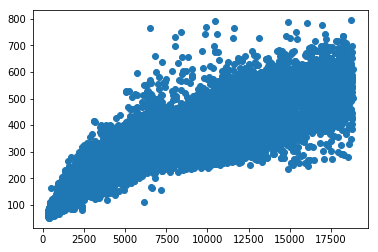

In [58]:
plt.scatter(subset_df.price , subset_df.volume)

In [59]:
lm = np.polyfit(subset_df.price , subset_df.volume , deg=1)

In [64]:
lm[0]

0.028606902739332564

In [65]:
lm[1]

97.69990801991264

In [60]:
regression_line = subset_df.price.apply(lambda x: x*lm[0] + lm[1])

Text(0,0.5,'volume')

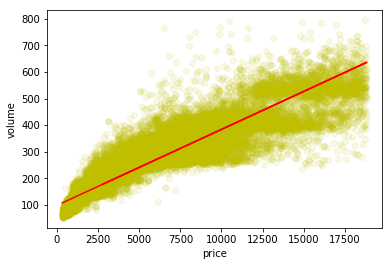

In [83]:
plt.scatter(subset_df.price ,subset_df.volume , alpha=0.1 , color="y")
plt.plot(subset_df.price ,regression_line  , color='red')
plt.xlabel("price")
plt.ylabel("volume")

Text(0,0.5,'price')

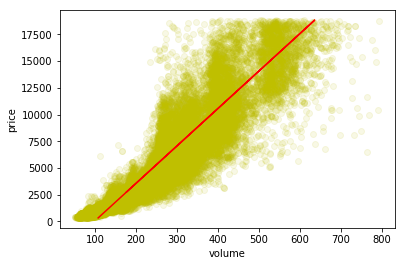

In [84]:
plt.scatter(y= subset_df.price , x = subset_df.volume , alpha=0.1 , color="y")
plt.plot( regression_line  ,subset_df.price , color='red')
plt.xlabel("volume")
plt.ylabel("price")

# Q13 . Mean price by clarity

In [85]:
# Use the function dplyr package
# to create a new data frame containing
# info on diamonds by clarity.

# Name the data frame diamondsByClarity

# The data frame should contain the following
# variables in this order.

#       (1) mean_price
#       (2) median_price
#       (3) min_price
#       (4) max_price
#       (5) n

# where n is the number of diamonds in each
# level of clarity.

In [92]:
clarity_index = df.clarity.unique()

In [91]:
diamondsByClarity["mean_price"] = diamondsByClarity.mean()["price"]

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [96]:
mean_price = df.groupby("clarity").mean()["price"]

In [97]:
media_price = df.groupby("clarity").median()["price"]

In [98]:
min_price = df.groupby("clarity").min()["price"]

In [99]:
max_price = df.groupby("clarity").max()["price"]

In [101]:
diamondsByClarity=pd.DataFrame({
    "mean_price" :mean_price , 
    "median_prce" : media_price , 
    "min_price" : min_price , 
    "max_price" : max_price
})

In [102]:
diamondsByClarity

,mean_price,median_prce,min_price,max_price
clarity,,,,
I1,3924.168691,3344,345,18531
IF,2864.839106,1080,369,18806
SI1,3996.001148,2822,326,18818
SI2,5063.028606,4072,326,18804
VS1,3839.455391,2005,327,18795
VS2,3924.989395,2054,334,18823
VVS1,2523.114637,1093,336,18777
VVS2,3283.737071,1311,336,18768


In [104]:
counts = df.clarity.value_counts()

In [105]:
diamondsByClarity["n"] = counts

In [106]:
diamondsByClarity

,mean_price,median_prce,min_price,max_price,n
clarity,,,,,
I1,3924.168691,3344,345,18531,741
IF,2864.839106,1080,369,18806,1790
SI1,3996.001148,2822,326,18818,13065
SI2,5063.028606,4072,326,18804,9194
VS1,3839.455391,2005,327,18795,8171
VS2,3924.989395,2054,334,18823,12258
VVS1,2523.114637,1093,336,18777,3655
VVS2,3283.737071,1311,336,18768,5066


In [109]:
# or we can create in this way 
diamondsByClarity=pd.DataFrame({
    "mean_price" :df.groupby("clarity").mean()["price"] , 
    "median_prce" :df.groupby("clarity").median()["price"] , 
    "min_price" : df.groupby("clarity").min()["price"] , 
    "max_price" : df.groupby("clarity").max()["price"] , 
    "n" : df.clarity.value_counts() , 
})

In [110]:
diamondsByClarity

,mean_price,median_prce,min_price,max_price,n
I1,3924.168691,3344,345,18531,741
IF,2864.839106,1080,369,18806,1790
SI1,3996.001148,2822,326,18818,13065
SI2,5063.028606,4072,326,18804,9194
VS1,3839.455391,2005,327,18795,8171
VS2,3924.989395,2054,334,18823,12258
VVS1,2523.114637,1093,336,18777,3655
VVS2,3283.737071,1311,336,18768,5066


# Q14 Bars charts of mean price

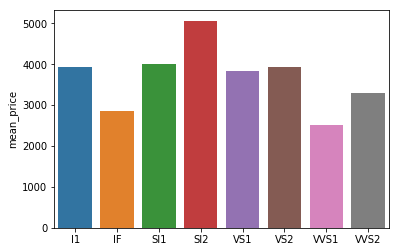

In [116]:
sns.barplot(x=diamondsByClarity.index , y = diamondsByClarity.mean_price)

# Q15 Trands in mean price

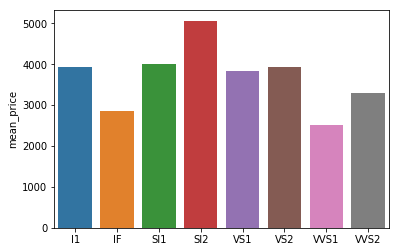

In [118]:
sns.barplot(x=diamondsByClarity.index , y = diamondsByClarity.mean_price)

In [137]:
diamondColorDF = df.groupby("color")

In [138]:
color_mean = diamondColorDF.price.mean()

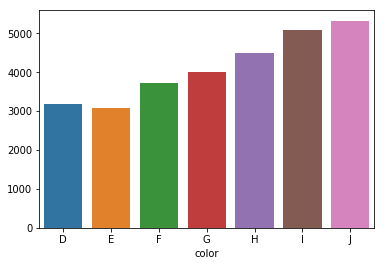

In [152]:
sns.barplot(x = color_mean.index , y=color_mean.values)


Text(0,0.5,'price')

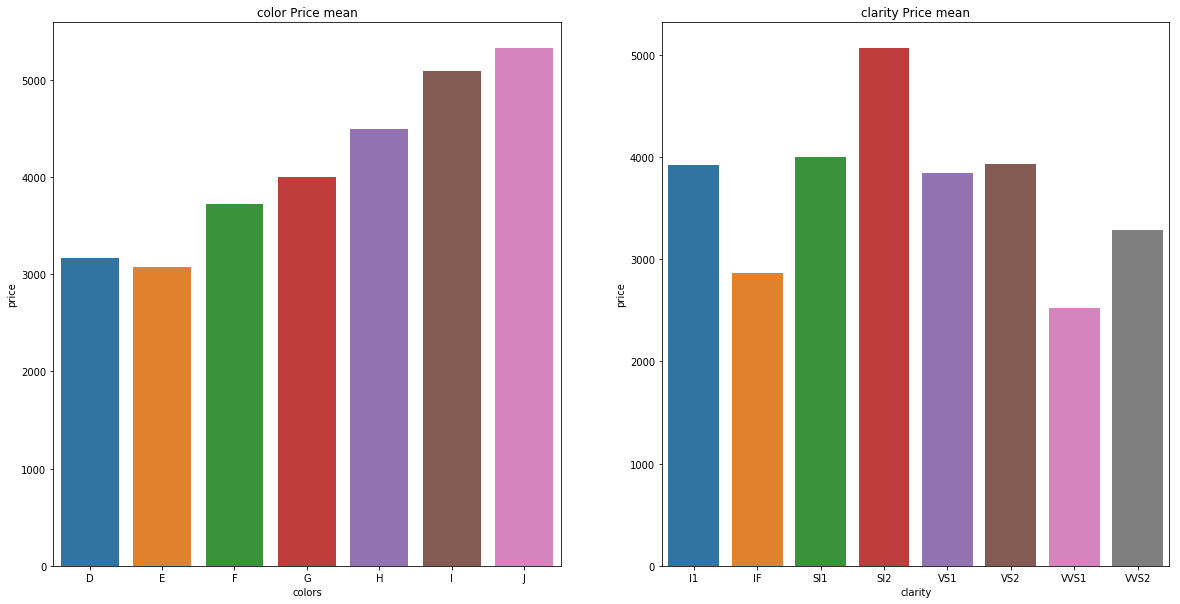

In [151]:
fig = plt.figure(figsize=(20 , 10))
fig.add_subplot(1 , 2, 1)
sns.barplot(x = color_mean.index , y=color_mean.values)
plt.title("color Price mean")
plt.xlabel("colors")
plt.ylabel("price")
fig.add_subplot(1 , 2, 2)
sns.barplot(x=diamondsByClarity.index , y = diamondsByClarity.mean_price)
plt.title("clarity Price mean")
plt.xlabel("clarity")
plt.ylabel("price")